In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import  MinMaxScaler

column_df = pd.read_csv('Data_Set_Steel_Columns_Fire - Final Sheet.csv')
Selcelted_Columns = ['Area (m2)', 'Ix(m4)', 'Iy(m4)',
                     'Eccentricity, e (mm)',
                    'Slenderness',
                     'Failure Load (kN)','Load Factor','Yield Strength @Room_Temp.(MPa)',
                     'Failure Temp.(C)','Axial restraint']
column_df=column_df[Selcelted_Columns].iloc[:297,:]
predictors = ['Area (m2)', 'Ix(m4)', 'Iy(m4)',
                     'Eccentricity, e (mm)',
                    'Slenderness',
                     'Failure Load (kN)','Load Factor','Yield Strength @Room_Temp.(MPa)',
                     'Axial restraint']
target = 'Failure Temp.(C)'
Data_X = column_df[predictors]
#Data_X = pd.get_dummies(column_df[predictors], drop_first=True)
Data_y = column_df['Failure Temp.(C)']
#Data_X['Failure Load (kN)'] = pd.to_numeric(Data_X['Failure Load (kN)'])

# split data into train and test sets
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(Data_X)

Data_y = Data_y.values.reshape(-1, 1)
y_scaled = scaler.fit_transform(Data_y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled,  test_size=0.33, random_state=2)

xgb_model = XGBRegressor(n_jobs=1)
clf = GridSearchCV(xgb_model,
                   {'updater':['grow_local_histmaker','refresh','prune','sync'],'max_depth': [2,4,5,7,8,10],
                    'n_estimators': [1000,2000,5000,10000,15000]}, verbose=1, n_jobs=1)
start_time = time.time()
clf.fit(X_train, y_train)
elapsed_time = time.time()-start_time
print('Elapsed Computational Time in training is {} mins'.format(elapsed_time/60))
print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[08:08:13] WARNING: /workspace/src/learner.cc:194: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
[08:08:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:08:14] WARNING: /workspace/src/learner.cc:194: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
[08:08:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:08:14] WARNING: /workspace/src/learner.cc:194: DANGER AHEAD: You have manually specified `updat

In [ ]:
model = XGBRegressor(updater='grow_local_histmaker',max_depth=2,n_estimators=2000)
model.fit(X_train, y_train,verbose=True, eval_metric = 'rmse')#,early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
score = model.score(X_train, y_train)  
print("Training score: ", score)

[08:16:55] WARNING: /workspace/src/learner.cc:194: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
[08:16:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score:  0.9986545939470364


In [ ]:
model.score(X_test, y_test)

0.8428834865068634

In [ ]:
ypred = model.predict(X_test)
import math
from sklearn import metrics 
mape  = metrics.mean_absolute_percentage_error(ypred,y_test)
mae = metrics.mean_absolute_error(ypred, y_test)
mse = metrics.mean_squared_error(ypred, y_test)
r2 = metrics.r2_score(ypred, y_test)

print("The model performance for testing set")
print("--------------------------------------")
print("MAPE is {}",format(mape))
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(math.sqrt(mse)))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAPE is {} 0.1585423563575209
MAE is 0.05768525204901523
RMSE is 0.07706852911611267
R2 score is 0.8398212877723529


Text(0, 0.5, 'Predicted')

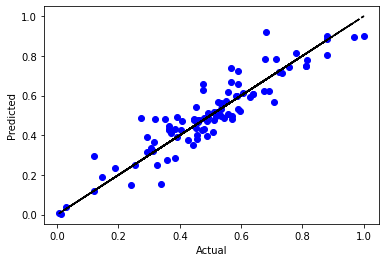

In [ ]:
plt.plot(y_test,ypred,'ob',y_test,y_test,'--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 4.0 MB/s 


In [ ]:
import shap

In [ ]:
type(X_train)

numpy.ndarray

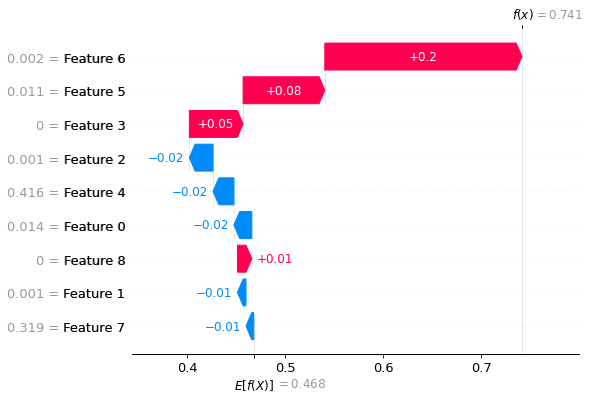

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

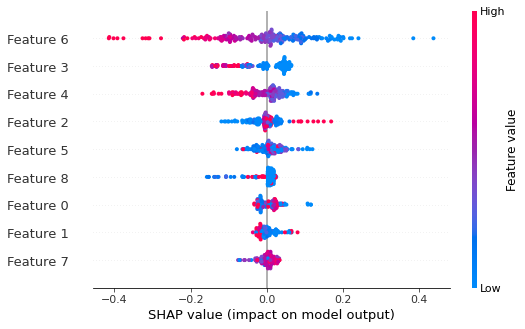

In [ ]:
shap.plots.beeswarm(shap_values)

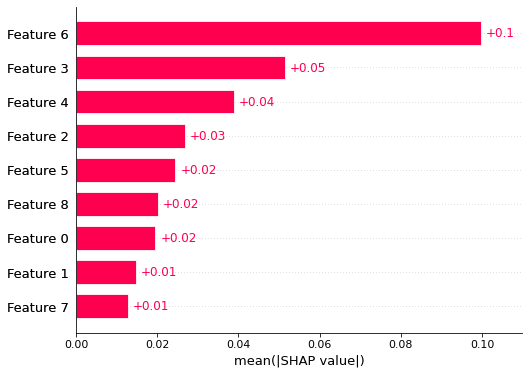

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.initjs()
shap.plots.force(shap_values)

In [ ]:
#!pip install explainerdashboard

In [ ]:
#from sklearn.inspection import PartialDependenceDisplay

In [ ]:

#Model1 = XGBRegressor(max_depth=2,n_estimators=2000).fit(X_train, y_train)
#Model.fit(X_train, y_train,verbose=False, eval_metric = 'rmse')
#PartialDependenceDisplay.from_estimator(Model1, X_train, predictors)

In [ ]:
#Data_X

In [ ]:
#feature_ids = [Data_X.feature_names.index(f) for f in predictors]

In [ ]:
#Data_X.feature_names

In [ ]:
X_train

array([[1.42332355e-02, 5.71601949e-04, 6.82587476e-04, ...,
        2.19617393e-03, 3.18891188e-01, 0.00000000e+00],
       [2.99789239e-02, 2.51793788e-03, 2.80350815e-03, ...,
        1.14132842e-02, 2.42728631e-01, 1.00000000e+00],
       [4.60857519e-02, 6.41396548e-03, 6.95300245e-03, ...,
        1.68067546e-02, 2.71469219e-01, 0.00000000e+00],
       ...,
       [5.03471997e-02, 4.90219939e-03, 1.49479091e-02, ...,
        1.27466694e-02, 2.47039719e-01, 0.00000000e+00],
       [7.83716358e-02, 3.33757517e-02, 2.27540400e-02, ...,
        1.64364948e-02, 3.76372363e-01, 0.00000000e+00],
       [2.74903829e-01, 1.45793430e-01, 1.25509254e-01, ...,
        5.60623231e-03, 3.12424556e-01, 0.00000000e+00]])

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
#from sklearn import datasets
#from sklearn.datasets import fetch_california_housing
#from sklearn.model_selection import train_test_split

In [ ]:
#cal_housing = fetch_california_housing()

In [ ]:
#cal_housing

In [ ]:
#print (cal_housing.feature_names, cal_housing.data.shape)

In [ ]:
#X_train1, X_test1, y_train1, y_test1 = train_test_split(cal_housing.data,
                                                    #cal_housing.target,
                                                    #test_size=0.4,
                                                    #random_state=123)

In [ ]:
#X_train1.shape

In [ ]:
feature_ids = [0,1,2,3,4,5,6,7,8]

In [ ]:
#feature_names = ['MedInc', 'AveOccup', 'HouseAge'] 
#feature_ids = [cal_housing.feature_names.index(f) for f in feature_names]

In [ ]:
feature_ids

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
X_train.shape

(198, 9)

In [ ]:
dtrain = xgb.DMatrix(X_train[:, feature_ids].reshape(len(X_train), len(feature_ids)), label = y_train)
dtest =  xgb.DMatrix(X_test[:, feature_ids].reshape(len(X_test), len(feature_ids)), label = y_test)

In [ ]:
type(dtrain)

xgboost.core.DMatrix

In [ ]:
#feature_monotones = [0] * (len(feature_names))
feature_monotones = [1, -1, 1]

params = {     #'updater':['grow_local_histmaker','refresh','prune','sync'],
          'max_depth': 2, #,4,5,7,8,10],
          'eta': 0.1, 
          'n_estimators': 2000,
          'silent': 1,
          'nthread': 2,
          'seed': 0,
          'eval_metric': 'rmse', 
          
          'monotone_constraints': '(' + ','.join([str(m) for m in feature_monotones]) + ')'
         }

bst_cv = xgb.cv(params, dtrain, 500, nfold = 5, early_stopping_rounds=10)

In [ ]:
evallist  = [(dtrain, 'train'), (dtest, 'eval')]

evals_result = {}
bst = xgb.train(params, dtrain, num_boost_round = bst_cv.shape[0], evals_result = evals_result, evals = evallist,  verbose_eval = False)

In [ ]:
#evals_result

In [ ]:
evals_result['train']['rmse'][-1]

0.037302

In [ ]:
print ('Number of boosting rounds %d,\
       Training RMSE: %.4f, \
       Testing RMSE: %.4f' % \
       (len(evals_result['train']['rmse']),
        evals_result['train']['rmse'][-1], 
        evals_result['eval']['rmse'][-1]))

Number of boosting rounds 317,       Training RMSE: 0.0373,        Testing RMSE: 0.0739


In [ ]:
def partial_dependency(bst, X, y, feature_ids = [], f_id = -1):
    
    """
    Calculate the dependency (or partial dependency) of a response variable on a predictor (or multiple predictors)
    1. Sample a grid of values of a predictor.
    2. For each value, replace every row of that predictor with this value, calculate the average prediction.
    """

    X_temp = X.copy()
    
    grid = np.linspace(np.percentile(X_temp[:, f_id], 0.1), 
                       np.percentile(X_temp[:, f_id], 99.5), 
                       50)
    y_pred = np.zeros(len(grid))
    
    if len(feature_ids) == 0 or f_id == -1:
        print ('Input error!')
        return
    else:
        for i, val in enumerate(grid):
            
            X_temp[:, f_id] = val
            data = xgb.DMatrix( X_temp[:, feature_ids].reshape( (len(X_temp), len(feature_ids)) ) )

            y_pred[i] = np.average(bst.predict(data, ntree_limit = bst.best_ntree_limit))
    
    return grid, y_pred

In [ ]:
print (list(enumerate(predictors)))

[(0, 'Area (m2)'), (1, 'Ix(m4)'), (2, 'Iy(m4)'), (3, 'Eccentricity, e (mm)'), (4, 'Slenderness'), (5, 'Failure Load (kN)'), (6, 'Load Factor'), (7, 'Yield Strength @Room_Temp.(MPa)'), (8, 'Axial restraint')]


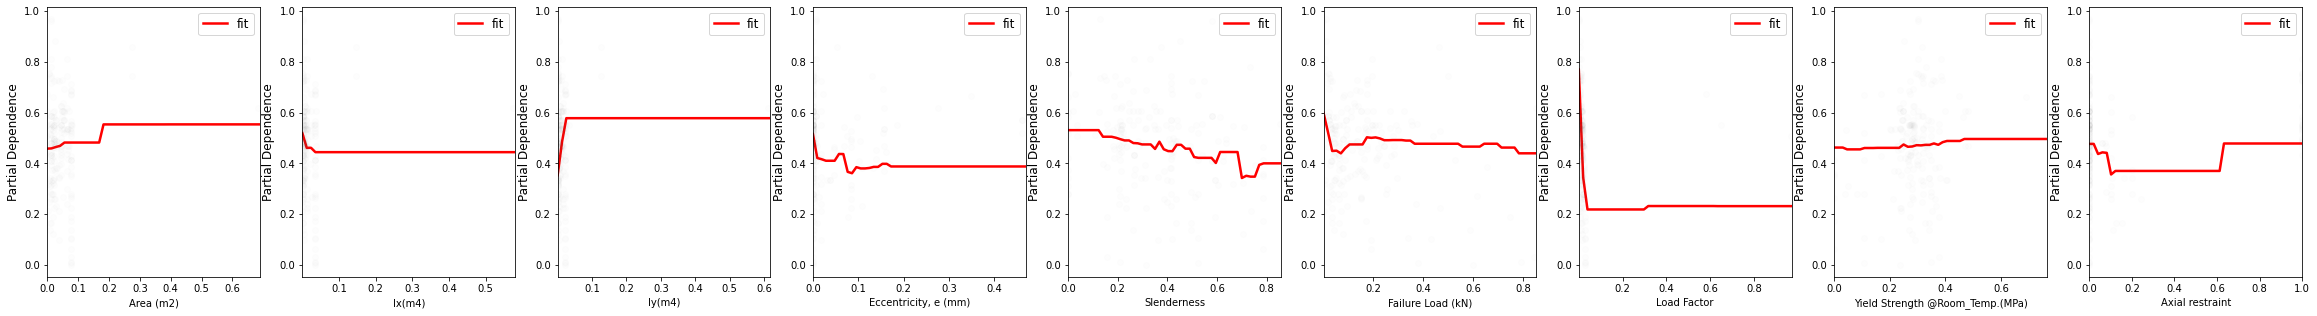

In [ ]:
fig, ax = plt.subplots(1, len(predictors))
fig.set_size_inches(len(predictors) * 4, 5)
plt.subplots_adjust(left = 0.07, right = 0.94, bottom = 0.15, top = 0.9)
cnt = 0

for i, f in enumerate(predictors):
    
    grid, y_pred = partial_dependency(bst, 
                                      X_train, 
                                      y_train, 
                                      feature_ids = feature_ids,
                                      f_id = cnt#cal_housing.feature_names.index(f)
                                     )
    #print(i,f)
    if i ==0 and len(predictors) == 1:
        axis = ax
    else:
        axis = ax[i]
        
    axis.plot(grid, y_pred, '-', color = 'red', linewidth = 2.5, label='fit')
    axis.plot(X_train[:, cnt], y_train, 'o', color = 'grey', alpha = 0.01)

    axis.set_xlim(min(grid), max(grid))
    axis.set_xlabel(f, fontsize = 10)
    axis.set_ylabel('Partial Dependence', fontsize = 12)
    
    handles, labels = axis.get_legend_handles_labels()
    axis.legend(handles, labels, loc = 'best', fontsize = 12)
    plt.savefig('w_constraint_three_feature.png')
    cnt +=1

In [ ]:
cnt

9

In [ ]:
data = xgb.DMatrix( X_test[:, feature_ids])
ypred = bst.predict(data)
import math
from sklearn import metrics 
mape  = metrics.mean_absolute_percentage_error(ypred,y_test)
mae = metrics.mean_absolute_error(ypred, y_test)
mse = metrics.mean_squared_error(ypred, y_test)
r2 = metrics.r2_score(ypred, y_test)

print("The model performance for testing set")
print("--------------------------------------")
print("MAPE is {}",format(mape))
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(math.sqrt(mse)))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAPE is {} 0.12812427317249922
MAE is 0.05509652669789462
RMSE is 0.0738995035738526
R2 score is 0.8230416509162097


Text(0, 0.5, 'Predicted')

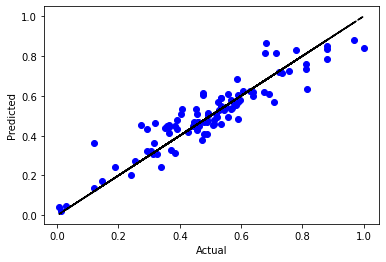

In [ ]:
plt.plot(y_test,ypred,'ob',y_test,y_test,'--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')

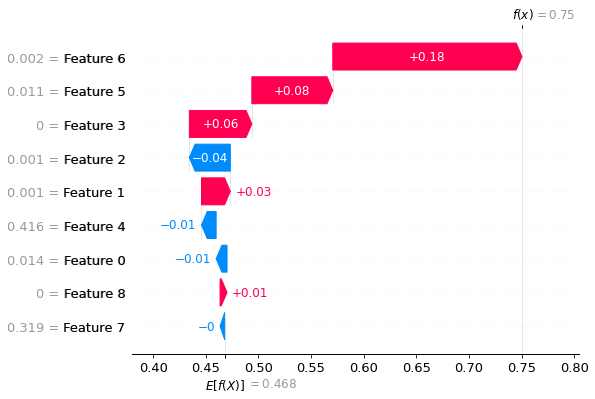

In [ ]:
explainer = shap.Explainer(bst)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

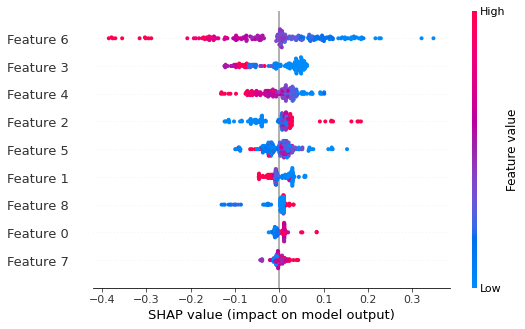

In [ ]:
shap.plots.beeswarm(shap_values)

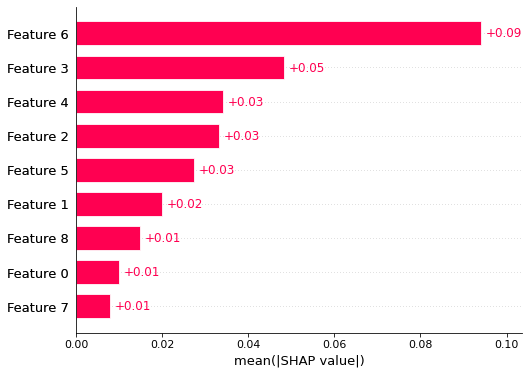

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.initjs()
shap.plots.force(shap_values)